In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
data_dir  = 'data/countries'
data_file = 'country-data.csv'

df = pd.read_csv(f'{data_dir}/{data_file}')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<AxesSubplot:xlabel='imports', ylabel='exports'>

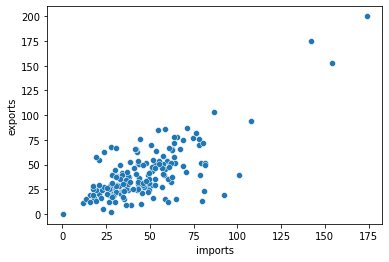

In [3]:
x_srs = df['imports']
y_srs = df['exports']
sns.scatterplot(x=x_srs, y=y_srs)

In [4]:
from sklearn.decomposition import PCA
df2 = df.drop(columns='country')
pca = PCA(n_components=2).fit(df2.values)

In [5]:
print(pca.explained_variance_ratio_.sum())
df_pca = pca.transform(df2)

0.999996525238076


/home/fabris/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


<AxesSubplot:>

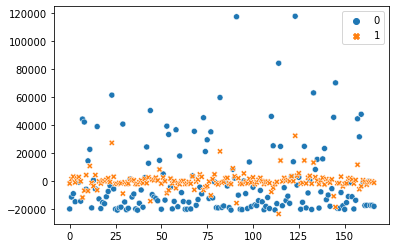

In [6]:
sns.scatterplot(data=df_pca)

### Fazendo o K-Means no pelo

In [7]:
from sklearn.cluster import KMeans

df2 = df.drop(columns='country')
arr = df2.values

In [8]:
k = 4

km     = KMeans(n_clusters=k, init='k-means++', n_init=100)
labels = km.fit_predict(arr)

In [9]:
df['group'] = labels

In [10]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [11]:
group0 = df[ df['group'] == 0 ]
group1 = df[ df['group'] == 1 ]
group2 = df[ df['group'] == 2 ]
group3 = df[ df['group'] == 3 ]

In [12]:
group0['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Eritrea', 'Fiji', 'Gabon', 'Gambia',
       'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Lebanon', 'Lesotho', 'Liberia',
       'Macedonia, FYR', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',

In [13]:
group1['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Denmark',
       'Finland', 'France', 'Germany', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Kuwait', 'Netherlands', 'Singapore', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [14]:
group2['country'].unique()

array(['Luxembourg', 'Norway', 'Qatar'], dtype=object)

In [15]:
group3['country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bahrain',
       'Barbados', 'Chile', 'Croatia', 'Cyprus', 'Czech Republic',
       'Equatorial Guinea', 'Estonia', 'Greece', 'Hungary', 'Israel',
       'Kazakhstan', 'Latvia', 'Libya', 'Lithuania', 'Malaysia', 'Malta',
       'New Zealand', 'Oman', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saudi Arabia', 'Seychelles', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Turkey', 'Uruguay', 'Venezuela'],
      dtype=object)

### Fazendo o HDBSCAN no pelo

In [28]:
from hdbscan import HDBSCAN

labels = HDBSCAN(min_cluster_size=3).fit(arr).labels_

In [29]:
df['group'] = labels

In [30]:
for i in range(-1, np.max(labels)):
    print(f'rs {i}')
    print(df[ df['group'] == i ]['country'].unique())


rs -1
['Bahamas' 'Bahrain' 'Barbados' 'Brazil' 'Brunei' 'Cameroon' 'Costa Rica'
 'Denmark' 'Dominican Republic' 'Egypt' 'Equatorial Guinea' 'Estonia'
 'Iran' 'Jamaica' 'Kiribati' 'Kuwait' 'Libya' 'Luxembourg' 'Malaysia'
 'Micronesia, Fed. Sts.' 'Moldova' 'Montenegro' 'Myanmar' 'Norway' 'Oman'
 'Qatar' 'Romania' 'Russia' 'Saudi Arabia' 'Singapore' 'Solomon Islands'
 'South Africa' 'St. Vincent and the Grenadines' 'Switzerland'
 'Timor-Leste' 'United Arab Emirates' 'United States' 'Vanuatu'
 'Venezuela']
rs 0
['Australia' 'Austria' 'Belgium' 'Canada' 'Finland' 'France' 'Germany'
 'Iceland' 'Ireland' 'Italy' 'Japan' 'Netherlands' 'Sweden'
 'United Kingdom']
rs 1
['Cyprus' 'Greece' 'Israel' 'New Zealand' 'Spain']
rs 2
['Czech Republic' 'Malta' 'Portugal' 'Slovak Republic' 'Slovenia'
 'South Korea']
rs 3
['Antigua and Barbuda' 'Argentina' 'Chile' 'Croatia' 'Hungary'
 'Kazakhstan' 'Latvia' 'Lithuania' 'Poland' 'Seychelles' 'Turkey'
 'Uruguay']
rs 4
['Azerbaijan' 'Belarus' 'Bulgaria' 'Gabon' 